In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from data_analysis.utils import business
from data.paths.parquet_paths import BUSINESS

In [7]:
business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   10000 non-null  object 
 1   name          10000 non-null  object 
 2   address       10000 non-null  object 
 3   attributes    8590 non-null   object 
 4   city          10000 non-null  object 
 5   state         10000 non-null  object 
 6   postal_code   10000 non-null  object 
 7   latitude      10000 non-null  float32
 8   longitude     10000 non-null  float32
 9   stars         10000 non-null  float32
 10  review_count  10000 non-null  int32  
 11  is_open       10000 non-null  int32  
 12  categories    10000 non-null  object 
 13  hours         7716 non-null   object 
dtypes: float32(3), int32(2), object(9)
memory usage: 898.6+ KB


In [8]:
business_df.isna().sum()

business_id        0
name               0
address            0
attributes      1410
city               0
state              0
postal_code        0
latitude           0
longitude          0
stars              0
review_count       0
is_open            0
categories         0
hours           2284
dtype: int64

### Variables - helpers

In [9]:
name = 'name'
address = 'address'
city = 'city'
state = 'state'
postal_code = 'postal_code'
latitude = 'latitude'
longitude = 'longitude'
stars = 'stars'
review_count = 'review_count'
is_open = 'is_open'
categories = 'categories'
hours = 'hours'
AcceptsInsurance = 'AcceptsInsurance'
AgesAllowed = 'AgesAllowed'
Alcohol = 'Alcohol'
Ambience = 'Ambience'
BYOB = 'BYOB'
BYOBCorkage = 'BYOBCorkage'
BestNights = 'BestNights'
BikeParking = 'BikeParking'
BusinessAcceptsBitcoin = 'BusinessAcceptsBitcoin'
BusinessAcceptsCreditCards = 'BusinessAcceptsCreditCards'
BusinessParking = 'BusinessParking'
ByAppointmentOnly = 'ByAppointmentOnly'
Caters = 'Caters'
CoatCheck = 'CoatCheck'
Corkage = 'Corkage'
DietaryRestrictions = 'DietaryRestrictions'
DogsAllowed = 'DogsAllowed'
DriveThru = 'DriveThru'
GoodForDancing = 'GoodForDancing'
GoodForKids = 'GoodForKids'
GoodForMeal = 'GoodForMeal'
HairSpecializesIn = 'HairSpecializesIn'
HappyHour = 'HappyHour'
HasTV = 'HasTV'
Music = 'Music'
NoiseLevel = 'NoiseLevel'
Open24Hours = 'Open24Hours'
OutdoorSeating = 'OutdoorSeating'
RestaurantsAttire = 'RestaurantsAttire'
RestaurantsCounterService = 'RestaurantsCounterService'
RestaurantsDelivery = 'RestaurantsDelivery'
RestaurantsGoodForGroups = 'RestaurantsGoodForGroups'
RestaurantsPriceRange2 = 'RestaurantsPriceRange2'
RestaurantsReservations = 'RestaurantsReservations'
RestaurantsTableService = 'RestaurantsTableService'
RestaurantsTakeOut = 'RestaurantsTakeOut'
Smoking = 'Smoking'
WheelchairAccessible = 'WheelchairAccessible'
WiFi = 'WiFi'

In [10]:
business_df[[stars, review_count]].describe()

,stars,review_count
count,10000.00000,10000.000000
mean,3.55045,35.067600
std,1.01852,103.118055
min,1.00000,3.000000
25%,3.00000,4.000000
50%,3.50000,9.000000
75%,4.50000,26.000000
max,5.00000,4138.000000


In [11]:
business_df.sample(3)

,business_id,name,address,attributes,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours
1917,iFjao7ZpIC212IG3bHcQZQ,Bowdog,6909 Farrell Road SE,None,Calgary,AB,T2H 0T3,50.991535,-114.062752,4.0,12,1,"[Dog Walkers, Pet Groomers, Pet Sitting, Pet S...","{'Monday': '6:0-19:0', 'Tuesday': '6:0-19:0', ..."
4911,aOIqI-nVd5KHQo2QUnZvBQ,Designer Cakes By April,"2743 S Market St, Ste 104","{'AcceptsInsurance': None, 'AgesAllowed': None...",Gilbert,AZ,85295,33.300510,-111.743141,4.0,33,0,"[Bakeries, Food]","{'Monday': '11:0-20:30', 'Tuesday': '11:0-20:3..."
718,IiTLzksQAv9U8CW3s0bmlg,Rudy's Mexican Grill,"8257 E Guadalupe Rd, Ste 114","{'AcceptsInsurance': None, 'AgesAllowed': None...",Mesa,AZ,85212,33.363003,-111.655518,4.0,68,1,"[Mexican, Restaurants]","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."


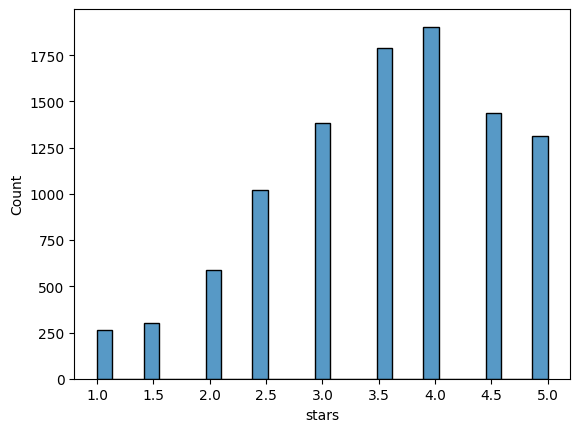

In [12]:
sns.histplot(data=business_df, x=stars)
plt.show()

review_count_median=9.0


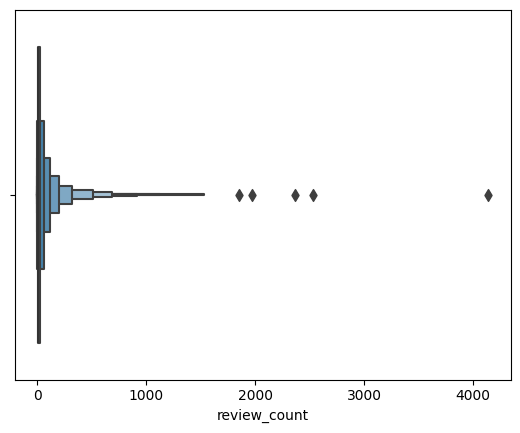

In [13]:
review_count_median = business_df[review_count].median()
print(f"{review_count_median=}")

sns.boxenplot(data=business_df, x=review_count)
plt.show()

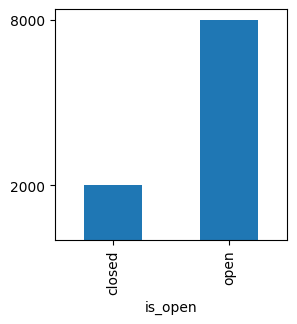

In [14]:
business_df[is_open] = business_df[is_open].apply(lambda x: 'open' if x else 'closed')

y = business_df.groupby(is_open)[is_open].count().values.tolist()
fig, ax = plt.subplots(figsize=(3, 3))
business_df.groupby(is_open)[is_open].count().plot(kind='bar', ax=ax).set_yticks(y)
plt.show()

In [15]:
from data.paths.parquet_paths import CHECKIN
checkin_df = pd.read_parquet(str(CHECKIN))

In [16]:
verifying_threshold = 10
business_df['not_verified'] = business_df[review_count].transform(lambda x:
    (x < verifying_threshold))

print(business_df['not_verified'].sample(10))

6383    False
6944    False
3476    False
5881     True
9418     True
8785     True
4718    False
8470    False
3740     True
446      True
Name: not_verified, dtype: bool


In [17]:
from datetime import datetime, timedelta

business_and_checkin = business_df.join(checkin_df, rsuffix='_checkin')
business_and_checkin['date'] = business_and_checkin['date'].dropna().apply(lambda x: x[0])
business_and_checkin['date'] = pd.to_datetime(business_and_checkin['date'])

youth_threshold = timedelta(days=365)
dataset_date = business_and_checkin['date'].max()

business_df['young'] = business_and_checkin['date'].transform(lambda x:
   None if x is None else dataset_date - x < youth_threshold)

print(business_df['young'].sample(10))

9667    False
9656    False
59      False
6449    False
7823    False
9598    False
6172    False
6497    False
5737    False
8823    False
Name: young, dtype: bool


In [18]:
# unpopular bussiness - little reviews, no checkins in last year (?)
# dying bussiness - was popular, unpopular now

# timeline will be divided into bins
# state of each business in each bin period must be calculated independently
# then unpopulars are last bin low-runners
# and populars are unpopulars with some really popular periods

# activities_df 
# index | bussiness_id | type | date
checkin_to_series = pd.Series(checkin_df['date'].to_numpy(), 
                              index=checkin_df['business_id'].to_numpy())
checkin_flat = checkin_to_series.apply(pd.Series).stack()
checkin_flat = checkin_flat.reset_index(level=[0])


In [19]:
checkin_flat['type'] = 'checkin'
checkin_flat.columns = ['business_id', 'date', 'type']
checkin_flat['date'] = pd.to_datetime(checkin_flat['date'])
checkin_flat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167733 entries, 0 to 7
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   business_id  1167733 non-null  object        
 1   date         1167733 non-null  datetime64[ns]
 2   type         1167733 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 35.6+ MB


In [20]:
from data.paths.parquet_paths import REVIEW
review_df = pd.read_parquet(str(REVIEW))

review_cut = review_df[['business_id', 'date']].copy()
review_cut['date'] = pd.to_datetime(review_cut['date'])
review_cut['type'] = 'review'
review_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   business_id  100000 non-null  object        
 1   date         100000 non-null  datetime64[ns]
 2   type         100000 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.3+ MB


In [21]:
activity_df = pd.concat([checkin_flat, review_cut])
activity_df = activity_df.sort_values(by='date')
activity_df.sample(10)

,business_id,date,type
34,0PVxodALQu-soL5J8bjerQ,2011-06-23 00:21:48,checkin
4488,0CB7YB1qRSWLQvMbHw3Fmw,2016-05-25 19:02:22,checkin
391,05BpxQYVbywxliQ9yA0CKw,2016-05-14 02:35:30,checkin
152,-io9loC11Z73p_QDAWytpA,2019-06-15 22:17:16,checkin
3,2GfKCR3S8I2m0iiyEd3sKA,2011-07-16 20:23:34,checkin
4,-xC1h0CMZgbW9z8cxwI6pw,2011-07-11 02:16:39,checkin
330,23gvCOhQcO5ahQ_Ou-OmgA,2013-12-14 19:03:42,checkin
59,10d6PDujQkQmrvQMK6V0xA,2015-07-12 00:58:31,checkin
153,0F0drnShYJr6HhyQjA3Tpg,2012-10-15 11:28:25,checkin
4269,-ed0Yc9on37RoIoG2ZgxBA,2016-03-09 20:21:34,checkin


In [22]:
bin_count = 56 # 14 years of polling, bin for each year quarter

activity_df['date_bin'] = pd.cut(activity_df['date'], bins = bin_count, labels = range(bin_count))
activity_df.sample(10)

,business_id,date,type,date_bin
2727,0W_pPAiTXgazY2mtX6o0_w,2017-07-08 20:14:40,checkin,46
3529,0QzCeORfF8EY34UODWRV9A,2015-02-23 01:02:25,checkin,37
46,27nh-2hNnNkf2dBk9aeKHQ,2015-07-21 14:22:52,checkin,39
407,-qxj-HqHo2tcK-jQVjAp1g,2013-01-21 21:27:10,checkin,30
1474,-oUM2uISux96lMGeawHIOA,2018-03-17 21:27:51,checkin,49
995,0Buxoc0cRqjpvkezo3bqog,2019-12-07 20:21:55,checkin,55
2,-UunZRrXJdL4whe9fma0Kg,2013-08-30 23:16:25,checkin,32
470,1bALsE6aZE23mGV2WPxN_g,2016-06-21 18:27:33,checkin,42
642,0LGnU7V3nepi8NUNzyQOXw,2015-12-14 21:44:38,checkin,40
2354,0ldxjei8v4q95fApIei3Lg,2014-12-22 05:56:13,checkin,37


In [23]:
# need count of activities for each date bin groupby(bussiness_id, bin)
activity_binned = activity_df.copy()
activity_binned = activity_binned.drop(['date'], axis=1)
activity_binned = activity_binned.groupby(['business_id', 'date_bin', 'type']).size().reset_index(name='count')

activity_binned['checkins'] = activity_binned.apply(lambda x: x[3] if x[2] == 'checkin' else 0, axis=1)
activity_binned['reviews'] = activity_binned.apply(lambda x: x[3] if x[2] == 'review' else 0, axis=1)
activity_binned = activity_binned.drop(['type', 'count'], axis = 1)

activity_binned.groupby(['business_id', 'date_bin']).sum().reset_index()

,business_id,date_bin,checkins,reviews
0,--1UhMGODdWsrMastO9DZw,0,0,0
1,--1UhMGODdWsrMastO9DZw,1,0,0
2,--1UhMGODdWsrMastO9DZw,2,0,0
3,--1UhMGODdWsrMastO9DZw,3,0,0
4,--1UhMGODdWsrMastO9DZw,4,0,0
...,...,...,...,...
1248179,zzwhN7x37nyjP0ZM8oiHmw,51,0,0
1248180,zzwhN7x37nyjP0ZM8oiHmw,52,0,0
1248181,zzwhN7x37nyjP0ZM8oiHmw,53,0,0
1248182,zzwhN7x37nyjP0ZM8oiHmw,54,0,0


In [33]:
# business_id | checkins | reviews
last_bin_activity = activity_binned[activity_binned.date_bin == bin_count - 1]

unpopular_checkins, unpopular_reviews = 0, 3

unpopular_bussinesses = (last_bin_activity[last_bin_activity.checkins <= unpopular_checkins]
                                          [last_bin_activity.reviews <= unpopular_reviews]
                        .drop(['date_bin'], axis=1)
)

unpopular_bussinesses = unpopular_bussinesses['business_id'].drop_duplicates()
unpopular_bussinesses

C:\Users\strel\AppData\Local\Temp\ipykernel_3216\4159905071.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unpopular_bussinesses = (last_bin_activity[last_bin_activity.checkins <= unpopular_checkins]


110        --1UhMGODdWsrMastO9DZw
223        --6MefnULPED_I942VcFNA
335        --7zmmkVg-IMGaXbuVd0SQ
446        --8LPVSo5i0Oo61X01sV9A
558        --9QQLMTbFzLJ_oT-ON3Xw
                    ...          
2495918    zz6S_y6C39iRU3h81Z1e2A
2496030    zzSYBWuv_fXGtSgsO-6_1g
2496142    zzlZJVkEhOzR2tJOLHcF2A
2496254    zzuOCWxuY39YJ1wnTwQ0Lg
2496366    zzwhN7x37nyjP0ZM8oiHmw
Name: business_id, Length: 22289, dtype: object

In [36]:
popular_checkins, popular_reviews = 0, 5

oncepopular_businesses = (activity_binned[activity_binned.checkins >= popular_checkins]
                                         [activity_binned.reviews >= popular_reviews]
                         .drop(['date_bin'], axis=1))

oncepopular_businesses = oncepopular_businesses['business_id'].drop_duplicates()
oncepopular_businesses

18107      -2ToCaDFpTNmmg3QFzxcWg
43999      -8F04F54iDT6VgWPCgybug
61457      -BbnAc9YEO6pjvJGEtFbVQ
66597      -CbDQXiuKzPQ0_jiUz03aw
82843      -FtngCwHCD2tRlH8jpj_Ag
                    ...          
2486137    zYb4kj2R54R2YPeNm829BA
2487397    zbVJRIXEU0LVGWpU1Wb--A
2490397    zidkKI_N1OPxsiddTOQH_Q
2492653    zpGCFAt_MydbQN4EsXee6w
2494779    zuVvDYJkKAbXQTTBauAqJQ
Name: business_id, Length: 867, dtype: object

In [38]:
dying_businesses = pd.merge(unpopular_bussinesses, 
                            oncepopular_businesses)
dying_businesses

,business_id
0,-2ToCaDFpTNmmg3QFzxcWg
1,-8F04F54iDT6VgWPCgybug
2,-BbnAc9YEO6pjvJGEtFbVQ
3,-CbDQXiuKzPQ0_jiUz03aw
4,-FtngCwHCD2tRlH8jpj_Ag
...,...
862,zYb4kj2R54R2YPeNm829BA
863,zbVJRIXEU0LVGWpU1Wb--A
864,zidkKI_N1OPxsiddTOQH_Q
865,zpGCFAt_MydbQN4EsXee6w
